In [8]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
import os

Matplotlib is building the font cache; this may take a moment.


In [53]:
path = os.getcwd()
path_figures = path + '/figures/'
path_figures_qutrit = path + '/figures/qutrit/'
os.makedirs(path_figures, exist_ok=True)
os.makedirs(path_figures_qutrit, exist_ok=True)

In [11]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

def set_plots_param():
    # Set default tick font size for all plots
    plt.rcParams['xtick.labelsize'] = 15
    plt.rcParams['ytick.labelsize'] = 15
    # Set default axis label font size for all plots
    plt.rcParams['axes.labelsize'] = 15
    return None

red = (160/256,40/256,41/256)
green = (151/256,161/256,105/256)
light_blue = (134/256,187/256,216/256)
blue = (51/256,101/256,138/256)
dark_blue = (47/256,72/256,88/256)

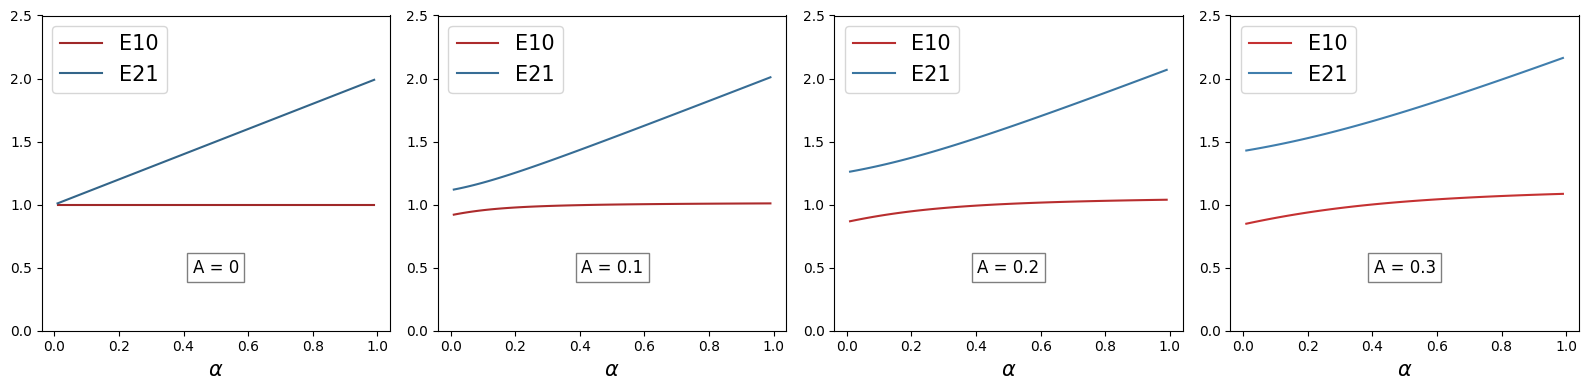

In [54]:
alpha = 0.2
A = 0.1
H2 = 1

def H_w0(w0,t,A,alpha):
    A12 = A*np.exp(1j*w0*t)
    A23 = A12
    H3 = 1 + alpha
    return np.array([[0,A12,0],[A12.conj(),H2,A23],[0,A23.conj(),H3]])

w0, t = 0,0 #they play no role in the eigenvalues
A_range = [0,0.1,0.2,0.3]
alpha_range = np.arange(0.01,1,.01)
fig, axs = plt.subplots(1,4,figsize=(16,4))

for i in range(4):
    ax = axs[i]
    A = A_range[i]
    energies = []
    for alpha in alpha_range:
        Hmat = H_w0(w0,t,A,alpha)
        eigenergies, eigenvectors = np.linalg.eig(Hmat)
        energies.append(np.real(eigenergies)-np.min(np.real(eigenergies)))
    energies = np.array(energies)
    # ax.plot(alpha_range,energies[:,0],label='E0',color=lighten_color(red,1-A))
    ax.plot(alpha_range,energies[:,1],label='E10',color=lighten_color(red,1-A/2))
    ax.plot(alpha_range,energies[:,2],label='E21',color=lighten_color(blue,1-A/2))
    ax.set_ylim(0,2.5)
    ax.set_xlabel(r'$\alpha$',fontsize=15)  
    ax.legend(loc='upper left',fontsize=15)
    ax.text(0.5,.5, f'A = {A}', fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.tight_layout()
plt.savefig(path_figures_qutrit+'qutrit_energies_vs_alpha.pdf',dpi=1000)

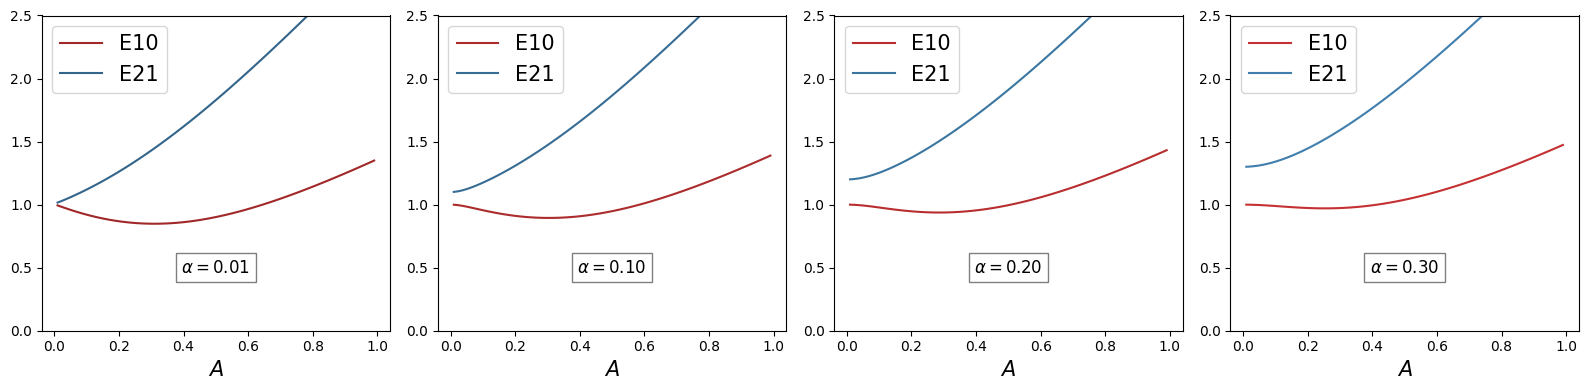

In [55]:

w0, t = 0,0 #they play no role in the eigenvalues
alpha_range = [0.01,0.1,0.2,0.3]
A_range = np.arange(0.01,1,.01)
fig, axs = plt.subplots(1,4,figsize=(16,4))

for i in range(4):
    ax = axs[i]
    alpha = alpha_range[i]
    energies = []
    for A in A_range:
        Hmat = H_w0(w0,t,A,alpha)
        eigenergies, eigenvectors = np.linalg.eig(Hmat)
        energies.append(np.real(eigenergies)-np.min(np.real(eigenergies)))
    energies = np.array(energies)
    # ax.plot(alpha_range,energies[:,0],label='E0',color=lighten_color(red,1-A))
    ax.plot(A_range,energies[:,1],label='E10',color=lighten_color(red,1-alpha/2))
    ax.plot(A_range,energies[:,2],label='E21',color=lighten_color(blue,1-alpha/2))
    ax.set_ylim(0,2.5)
    ax.set_xlabel(r'$A$',fontsize=15)
    ax.legend(loc='upper left',fontsize=15)
    ax.text(0.5,.5, r'$\alpha = {0:.2f}$'.format(alpha), fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.tight_layout()
plt.savefig(path_figures_qutrit+'qutrit_energies_vs_A.pdf',dpi=1000)

# seeing the eigenvector weights

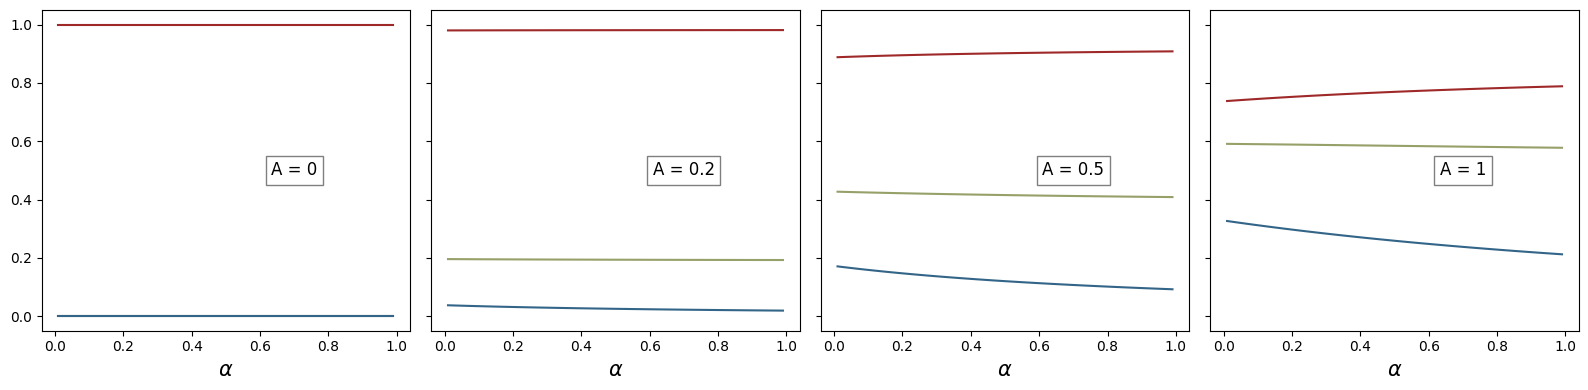

In [112]:
# now we do the same, first for w0=0
alpha = 0.2
A = 0.1
H2 = 1

def H_w0(w0,t,A,alpha):
    A12 = A*np.exp(1j*w0*t)
    A23 = A12
    H3 = 1 + alpha
    return np.array([[0,A12,0],[A12.conj(),H2,A23],[0,A23.conj(),H3]])

w0, t = 0,0 #they play no role in the eigenvalues
A_range = [0,0.2,0.5,1]
alpha_range = np.arange(0.01,1,.01)

fig, axs = plt.subplots(1,4,figsize=(16,4),sharey=True)
for i in range(4):
    ax = axs[i]
    A = A_range[i]
    c_00, c_10, c_20 = [], [], []
    for alpha in alpha_range:
        Hmat = H_w0(w0,t,A,alpha)
        eigenergies, eigenvectors = np.linalg.eigh(Hmat)
        eig0 = eigenvectors[:,0]
        eig0 = eig0/np.linalg.norm(eig0)
        c_00.append(eig0[0])
        c_10.append(eig0[1])
        c_20.append(eig0[2])
    
    c_00, c_10, c_20 = np.array(c_00), np.array(c_10), np.array(c_20)
    norm = np.sqrt(np.abs(c_00)**2 + np.abs(c_10)**2 + np.abs(c_20)**2)

    ax.plot(alpha_range,np.real(np.sqrt(c_00**2)),label=r'$|\langle 0|\lambda_0\rangle|$',color=lighten_color(red,1))
    ax.plot(alpha_range,np.real(np.sqrt(c_10**2)),label=r'$|\langle 1|\lambda_0\rangle|$',color=lighten_color(green,1))
    ax.plot(alpha_range,np.real(np.sqrt(c_20**2)),label=r'$|\langle 2|\lambda_0\rangle|$',color=lighten_color(blue,1))
    ax.set_xlabel(r'$\alpha$',fontsize=15)  
    # ax.legend(loc='best',fontsize=15)
    ax.text(0.7,.5, f'A = {A}', fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.tight_layout()
plt.savefig(path_figures_qutrit+'qutrit_vectors_vs_alpha.pdf',dpi=1000)

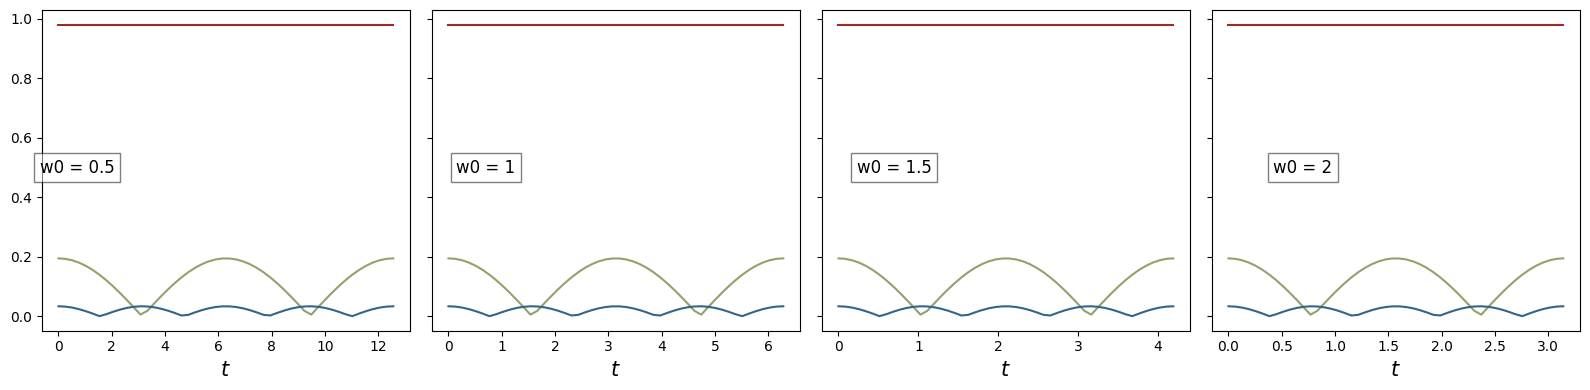

In [113]:
#so let's set A=0.2, alpha= 0.1, and see what happens as a function of frequency.
fig, axs = plt.subplots(1,4,figsize=(16,4),sharey=True)

A, alpha = 0.2, 0.1
w0_range = [0.5,1,1.5,2]
for i in range(4):
    ax = axs[i]
    w0 = w0_range[i]
    t_range = np.linspace(0,2*np.pi/w0,50)
    c_00, c_10, c_20 = [], [], []
    for t in t_range:
        Hmat = H_w0(w0,t,A,alpha)
        eigenergies, eigenvectors = np.linalg.eigh(Hmat)
        eig0 = eigenvectors[:,0]
        eig0 = eig0/np.linalg.norm(eig0)
        c_00.append(eig0[0])
        c_10.append(eig0[1])
        c_20.append(eig0[2])
    
    c_00, c_10, c_20 = np.array(c_00), np.array(c_10), np.array(c_20)
    norm = np.sqrt(np.abs(c_00)**2 + np.abs(c_10)**2 + np.abs(c_20)**2)

    ax.plot(t_range,np.real(np.sqrt(c_00**2)),label=r'$|\langle 0|\lambda_0\rangle|$',color=lighten_color(red,1))
    ax.plot(t_range,np.real(np.sqrt(c_10**2)),label=r'$|\langle 1|\lambda_0\rangle|$',color=lighten_color(green,1))
    ax.plot(t_range,np.real(np.sqrt(c_20**2)),label=r'$|\langle 2|\lambda_0\rangle|$',color=lighten_color(blue,1))
    ax.set_xlabel(r'$t$',fontsize=15)  
    # ax.legend(loc='best',fontsize=15)
    ax.text(0.7,.5, f'w0 = {w0}', fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
plt.tight_layout()

# Evolution

0.9773366096958528


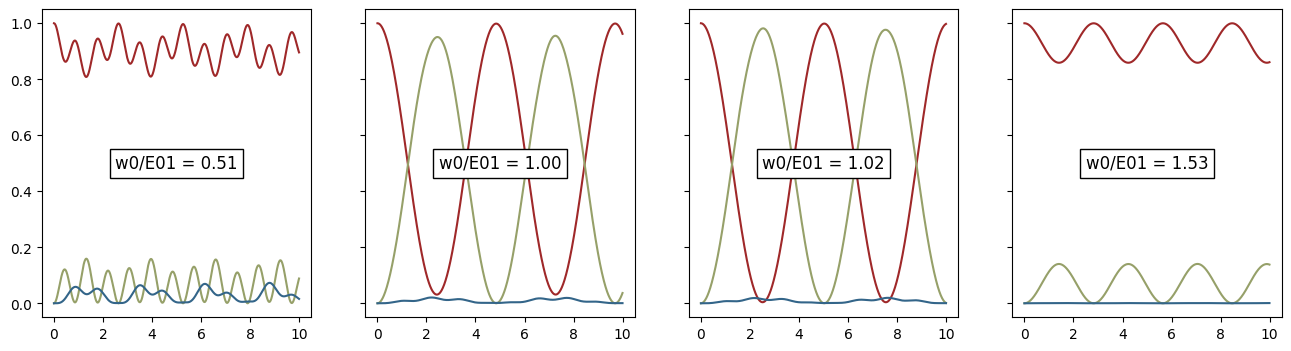

In [151]:
import numpy as np
import scipy.integrate

def differential_equation(t, X, w0, A, alpha):
    H = H_w0(w0, t, A, alpha)
    return -1j*H @ X

def get_XT(w0,A,alpha,X0,t_eval):

    solution = scipy.integrate.solve_ivp(differential_equation, [0, t_eval[-1]], X0, args=(w0, A, alpha), method='RK45', t_eval=t_eval)
    t_values = solution.t
    X_values = solution.y
    return t_values, X_values

def get_amplitudes(XT):
    return np.abs(XT[0])**2, np.abs(XT[1])**2, np.abs(XT[2])**2

fig, axs = plt.subplots(1,4,figsize=(16,4),sharey=True)
# Initial conditions and parameters
w0_range = [0.5,0.977,1,1.5]
A = 0.1
alpha = 0.2
# Compute the eigenvalues of the Hamiltonian at w0 = 0
w0_zero = 0
H_zero = H_w0(w0_zero, 0, A, alpha)
eigenvalues_zero, _ = np.linalg.eigh(H_zero)
E01 = eigenvalues_zero[1] - eigenvalues_zero[0]

print(E01)

for i in range(4):
    w0 = w0_range[i]
    ax = axs[i]
    T = 10*2*np.pi/w0
    X0 = np.array([1, 0, 0], dtype=complex)  # Initial state vector
    # Time points at which to evaluate the solution
    t_eval = np.arange(0, T, 0.05)
    times, XT = get_XT(w0, A, alpha, X0, t_eval)
    c0, c1, c2 = get_amplitudes(XT)
    ax.plot(times*w0/2/np.pi, c0, label=r'$|c_0|^2$',color=lighten_color(red,1))
    ax.plot(times*w0/2/np.pi, c1, label=r'$|c_1|^2$',color=lighten_color(green,1))
    ax.plot(times*w0/2/np.pi, c2, label=r'$|c_2|^2$',color=lighten_color(blue,1))
    ratio = w0 / E01
    ax.text(0.5, 0.5, f'w0/E01 = {ratio:.2f}', transform=ax.transAxes, fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=1))


Text(0, 0.5, '$\\max |c_i|^2$')

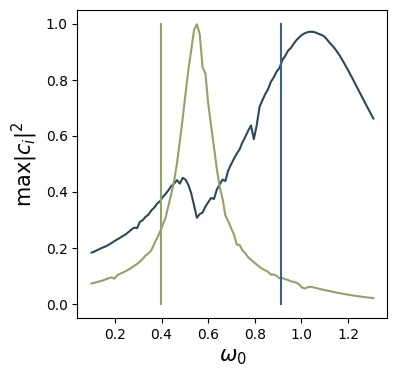

In [206]:
# we scan the frequencies over 10 periods to find the highest achievable |1> population
def max_c(w0, A, alpha):
    T = 10 * 2 * np.pi / w0
    t_eval = np.arange(0, T, 0.05)
    X0 = np.array([1, 0, 0], dtype=complex)  # Initial state vector
    times, XT = get_XT(w0, A, alpha, X0, t_eval)
    c0, c1, c2 = get_amplitudes(XT)
    max_c1 = max(c1)
    max_c2 = max(c2)
    max_c1_time = times[np.argmax(c1)]
    max_c2_time = times[np.argmax(c2)]
    return max_c1, max_c2, max_c1_time*w0/2*np.pi, max_c2_time*w0/2*np.pi

# Compute the eigenvalues of the Hamiltonian at w0 = 0
w0_zero = 0
H_zero = H_w0(w0_zero, 0, A, alpha)
eigenvalues_zero, _ = np.linalg.eigh(H_zero)
E01 = eigenvalues_zero[1] - eigenvalues_zero[0]
E21 = eigenvalues_zero[2] - eigenvalues_zero[1]
E20 = eigenvalues_zero[2] - eigenvalues_zero[0]

fig, ax = plt.subplots(figsize=(4,4))
A = 0.2
alpha = 0.5*A
w0_range = np.linspace(0.1,E01+E21,100)
c1_max, c2_max = [], []
c1_max_times, c2_max_times = [], []
for w0 in w0_range:
    c1, c2, c1_time, c2_time = max_c(w0, A, alpha)
    c1_max.append(c1)
    c2_max.append(c2)
    c1_max_times.append(c1_time)
    c2_max_times.append(c2_time)

ax.plot(w0_range,c1_max,color=dark_blue)
ax.plot(w0_range,c2_max,color=green)
ax.plot([E01,E01],[0,1],color=lighten_color(blue,1))
ax.plot([E21,E21],[0,1],color=lighten_color(green,1))
ax.set_xlabel(r'$\omega_0$',fontsize=15)
ax.set_ylabel(r'$\max |c_i|^2$',fontsize=15)



# Floquet evolution

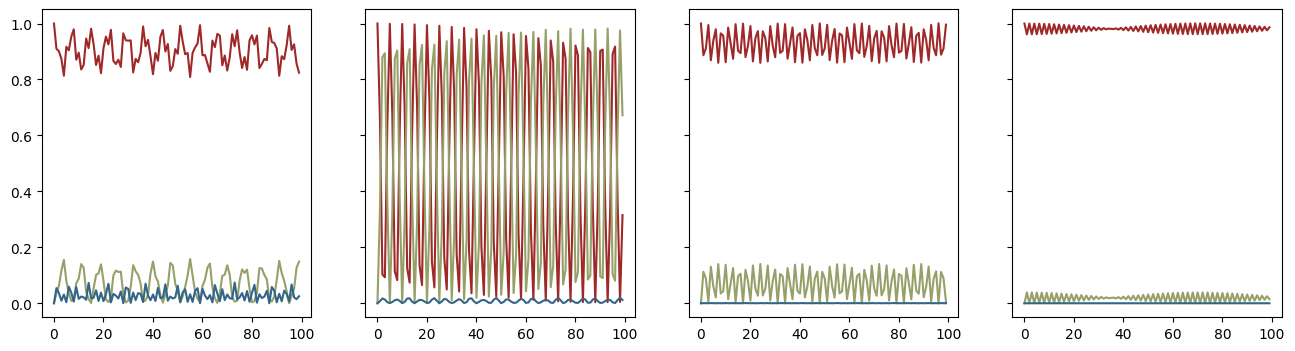

In [131]:
# we solve the linear equation up to the first period T and then we propagate the solution
def matrix_differential_equation(t, U_flat, w0, A, alpha):
    H = H_w0(w0, t, A, alpha)
    U = U_flat.reshape((3, 3))
    dU_dt = -1j*H @ U
    return dU_dt.flatten()

def get_U_T(w0,A,alpha):
    # Initial conditions and parameters
    T = 2*np.pi/w0  # Period of the driving field
    U0 = np.eye(3, dtype=complex).flatten()  # Initial unitary operator (identity matrix)
    
    # Solve the matrix differential equation
    solution = sp.integrate.solve_ivp(matrix_differential_equation, [0, T], U0, args=(w0, A, alpha), method='RK45')

    # Extract the solution
    t_values = solution.t
    U_values = solution.y.T.reshape(-1, 3, 3)
    U_T = U_values[-1]
    return U_T, t_values[-1]/T

def apply_UT_N_times(U_T, N,X0):
    Xs = [X0]
    for i in range(N):
        X = Xs[-1]
        Xn = U_T @ X
        Xs.append(Xn)
    return Xs

fig, axs = plt.subplots(1,4,figsize=(16,4),sharey=True)
# Initial conditions and parameters
w0_range = [0.5,1,1.5,2]
A = 0.1
alpha = 0.2
N = 100 # number of ccycles to propagate the solution
for i in range(4):
    ax = axs[i]
    w0 = w0_range[i]
    T = 2*np.pi/w0  # Period of the driving field
    U0 = np.eye(3, dtype=complex).flatten()  # Initial unitary operator (identity matrix)
    X0 = np.array([1,0,0],dtype=complex)
    U_T, t = get_U_T(w0,A,alpha)#check t=1.0
    Xs = apply_UT_N_times(U_T, N, X0)
    c_00, c_10, c_20 = [], [], []
    for i in range(N):
        Xi = Xs[i]
        c0, c1, c2 = np.abs(Xi[0])**2, np.abs(Xi[1])**2, np.abs(Xi[2])**2
        c_00.append(c0)
        c_10.append(c1)
        c_20.append(c2)
    c_00, c_10, c_20 = np.array(c_00), np.array(c_10), np.array(c_20)
    ax.plot(np.arange(N),c_00,label=r'$|c_0|^2$',color=lighten_color(red,1))
    ax.plot(np.arange(N),c_10,label=r'$|c_1|^2$',color=lighten_color(green,1))
    ax.plot(np.arange(N),c_20,label=r'$|c_2|^2$',color=lighten_color(blue,1))
    